In [1]:
from selenium import webdriver
driver = webdriver.Chrome()

In [2]:
driver.get('https://bsr.twse.com.tw/bshtm/')

In [4]:
driver.page_source

'<html xmlns="http://www.w3.org/1999/xhtml"><head>\n    <title>TAIWAN STOCK EXCHANGE.買賣日報表查詢系統</title>\n\n    <style type="text/css">\n        body {\n            margin: 0;\n            padding: 0;\n            border: 0;\n            overflow: hidden;\n            height: 100%;\n            max-height: 100%;\n        }\n    </style>\n</head>\n<frameset cols="300,*" border="0">\n   <frame id="page1" name="page1" src="bsMenu.aspx">\n   <frame id="page2" name="page2" src="bsWelcome.aspx">\n</frameset>\n\n</html>'

In [5]:
driver.switch_to.frame("page1")

In [7]:
from selenium.webdriver.common.by import By
stock_input = driver.find_element(By.CSS_SELECTOR, '#TextBox_Stkno')

In [8]:
stock_input.send_keys("2330")

In [24]:
captcha_input = driver.find_element(By.CSS_SELECTOR, '#Panel_bshtm img')

In [25]:
captcha_input.screenshot("captcha.png")

True

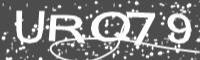

In [26]:
from IPython.display import Image, display
display(Image("captcha.png"))

In [27]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

base64_image = encode_image("captcha.png")


In [12]:
from openai import OpenAI
client = OpenAI(api_key = 'sk-proj-')


In [15]:
SYSTEM_INSTRUCTION = '''識別圖片中的CAPTCHA內容後，以JSON格式輸出。

# Steps

1. 分析圖片，識別其中的CAPTCHA內容。
2. 確保識別內容的準確性。
3. 將識別出的CAPTCHA內容轉換為JSON格式。

# Output Format

輸出應為以下JSON格式：
```json
{
  "captchaText": "[識別出的CAPTCHA內容]"
}
```

# Notes

- 若識別過程中發現不清楚的字母或數字，請考慮可能的選擇，並選擇最有可能的。
- 確保輸出內容只包含CAPTCHA的文字，不包括其他識別或處理信息。'''

In [28]:
response = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {  "role": "system",
                    "content": [
                        {"type": "text","text": SYSTEM_INSTRUCTION}
                    ] 
                },
                {   "role": "user",
                    "content": [
                        {"type": "image_url","image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}}
                    ]
                }
            ],
            response_format={"type": "json_object"}
)

In [29]:
import json
jd = json.loads(response.choices[0].message.content)

In [30]:
jd.get('captchaText')

'URQ79'

In [31]:
captcha_input = driver.find_element(By.CSS_SELECTOR, "input[name=CaptchaControl1]")
captcha_input.send_keys(jd.get('captchaText'))

In [32]:
q_input = driver.find_element(By.CSS_SELECTOR, "input[name=btnOK]")
q_input.click()



In [33]:
q_input = driver.find_element(By.ID, "HyperLink_DownloadCSV")
q_input.click()

